## Problem statement
* [Introduction](#Introduction)
* [1. EDA & Data Transformation](#1.-EDA-&-Data-Transformation)
  * [1.1 Checking Missing](#1.1.-Checking-missing-values)
* [2. Categorial Encoding](#2.-Categorial-Encoding)

# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import string
import spacy
en_core = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize.regexp import regexp_tokenize
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
train_df=pd.read_csv('./dataset/train_file.csv')
test_df=pd.read_csv('./dataset/test_file.csv')

In [5]:
train_df.head(2)

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",SINGLE FAMILY / DUPLEX
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",COMMERCIAL


In [61]:
train_df.dtypes

Application/Permit Number            int64
Permit Type                         object
Address                             object
Description                         object
Action Type                         object
Work Type                           object
Applicant Name                      object
Application Date                    object
Issue Date                          object
Final Date                          object
Expiration Date                     object
Status                              object
Contractor                          object
Permit and Complaint Status URL     object
Master Use Permit                  float64
Latitude                           float64
Longitude                          float64
Location                            object
Category                            object
dtype: object

In [62]:
train_df.shape

(33539, 19)

In [63]:
train_df['Category'].nunique()

5

In [64]:
dtypes=list(train_df.iloc[0])
for dtype,series_type,col in zip(dtypes,train_df.dtypes,train_df.columns):
    print(col,'---->',series_type,'------------->',type(dtype))

Application/Permit Number ----> int64 -------------> <class 'numpy.int64'>
Permit Type ----> object -------------> <class 'str'>
Address ----> object -------------> <class 'str'>
Description ----> object -------------> <class 'str'>
Action Type ----> object -------------> <class 'str'>
Work Type ----> object -------------> <class 'str'>
Applicant Name ----> object -------------> <class 'str'>
Application Date ----> object -------------> <class 'str'>
Issue Date ----> object -------------> <class 'str'>
Final Date ----> object -------------> <class 'float'>
Expiration Date ----> object -------------> <class 'str'>
Status ----> object -------------> <class 'str'>
Contractor ----> object -------------> <class 'float'>
Permit and Complaint Status URL ----> object -------------> <class 'str'>
Master Use Permit ----> float64 -------------> <class 'numpy.float64'>
Latitude ----> float64 -------------> <class 'numpy.float64'>
Longitude ----> float64 -------------> <class 'numpy.float64'>
Locat

# 1. EDA & Data Transformation

Exploratory Data Analysis (EDA) and Data Transformation are often thought as a cycle (EDA &rarr; Transform &rarr; EDA etc.), I'll start with **checking missing values**, then I'll get to transforming nominal data, and later on I'll do EDA on numeric data. As the nominal data is quite entangled (efter extraction reasembles text corpus) in this dataset, I'll omit the EDA of this part. 



[Text(0, 0, 'SINGLE FAMILY / DUPLEX'),
 Text(0, 0, 'COMMERCIAL'),
 Text(0, 0, 'INSTITUTIONAL'),
 Text(0, 0, 'MULTIFAMILY'),
 Text(0, 0, 'INDUSTRIAL')]

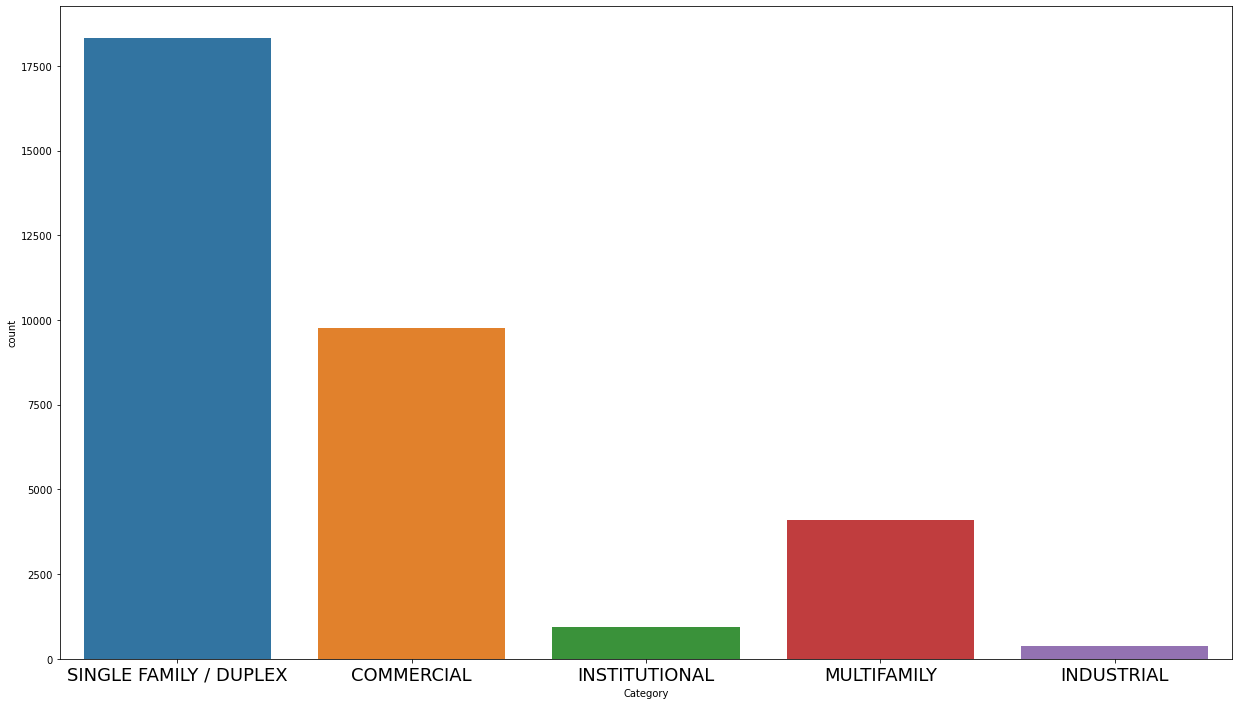

In [65]:
plt.figure(figsize=(21,12))
# count=train_df.groupby(['Category']).count().plot(kind='bar')

count_plot=sns.countplot(x='Category', data=train_df)
count_plot.set_xticklabels(count_plot.get_xmajorticklabels(), fontsize = 18)
# count_plot.set_yticklabels(count_plot.get_ymajorticklabels(), fontsize = 6)

[Text(0, 0, 'Construction'),
 Text(0, 0, 'Demolition'),
 Text(0, 0, 'Site Development')]

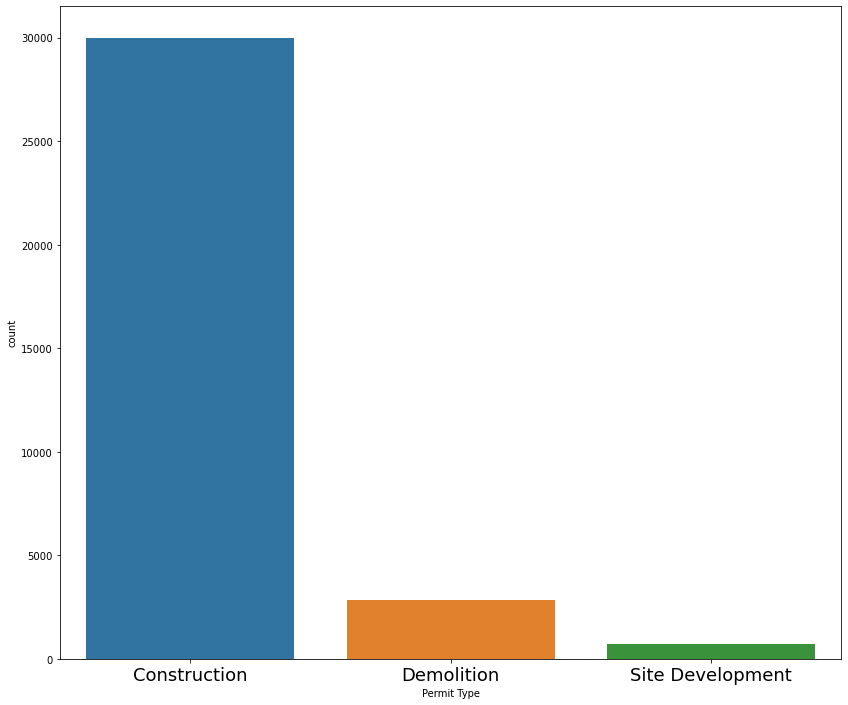

In [66]:

plt.figure(figsize=(14,12))
# count=train_df.groupby(['Category']).count().plot(kind='bar')

count_plot=sns.countplot(x='Permit Type', data=train_df)
count_plot.set_xticklabels(count_plot.get_xmajorticklabels(), fontsize = 18)
# count_plot.set_yticklabels(count_plot.get_ymajorticklabels(), fontsize = 6)

## 1.1. Checking missing values

In [67]:
Exploratory = train_df.copy() 

In [68]:
nan_percent = Exploratory.isna().mean()*100
nan_count = Exploratory.isna().sum()
pd.concat([nan_count.rename('missing_count'), nan_percent.round().rename('missing_percent')], axis=1)

,missing_count,missing_percent
Application/Permit Number,0,0.0
Permit Type,0,0.0
Address,19,0.0
Description,10,0.0
Action Type,779,2.0
Work Type,0,0.0
Applicant Name,135,0.0
Application Date,6939,21.0
Issue Date,10624,32.0
Final Date,17851,53.0


## 1.2 Ploting Count of Missing values 

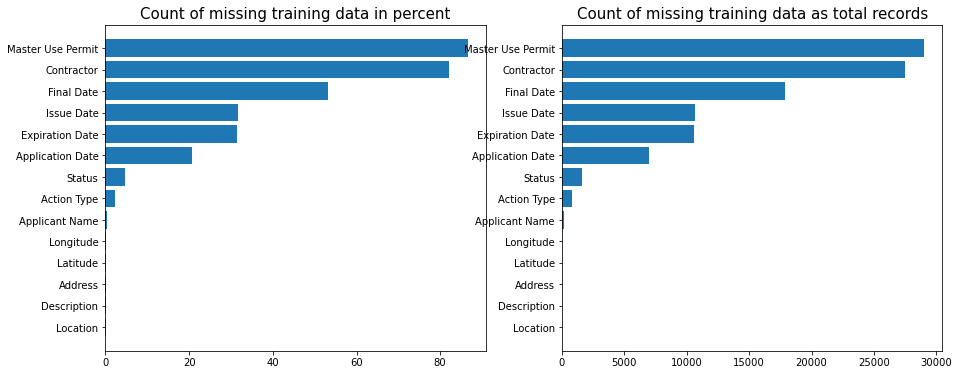

In [69]:
# Capture the necessary data
variables = train_df.columns

count = []

for variable in variables:
    length = train_df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(train_df), 2)
count = pd.Series(count)

missing = pd.DataFrame()
missing['variables'] = variables
missing['count'] = len(train_df) - count
missing['count_pct'] = 100 - count_pct
missing = missing[missing['count_pct'] > 0]
missing.sort_values(by=['count_pct'], inplace=True)
missing_train = np.array(missing['variables'])

#Plot number of available data per variable
plt.subplots(figsize=(15,6))

# Plots missing data in percentage
plt.subplot(1,2,1)
plt.barh(missing['variables'], missing['count_pct'])
plt.title('Count of missing training data in percent', fontsize=15)

# Plots total row number of missing data
plt.subplot(1,2,2)
plt.barh(missing['variables'], missing['count'])
plt.title('Count of missing training data as total records', fontsize=15)

plt.show()

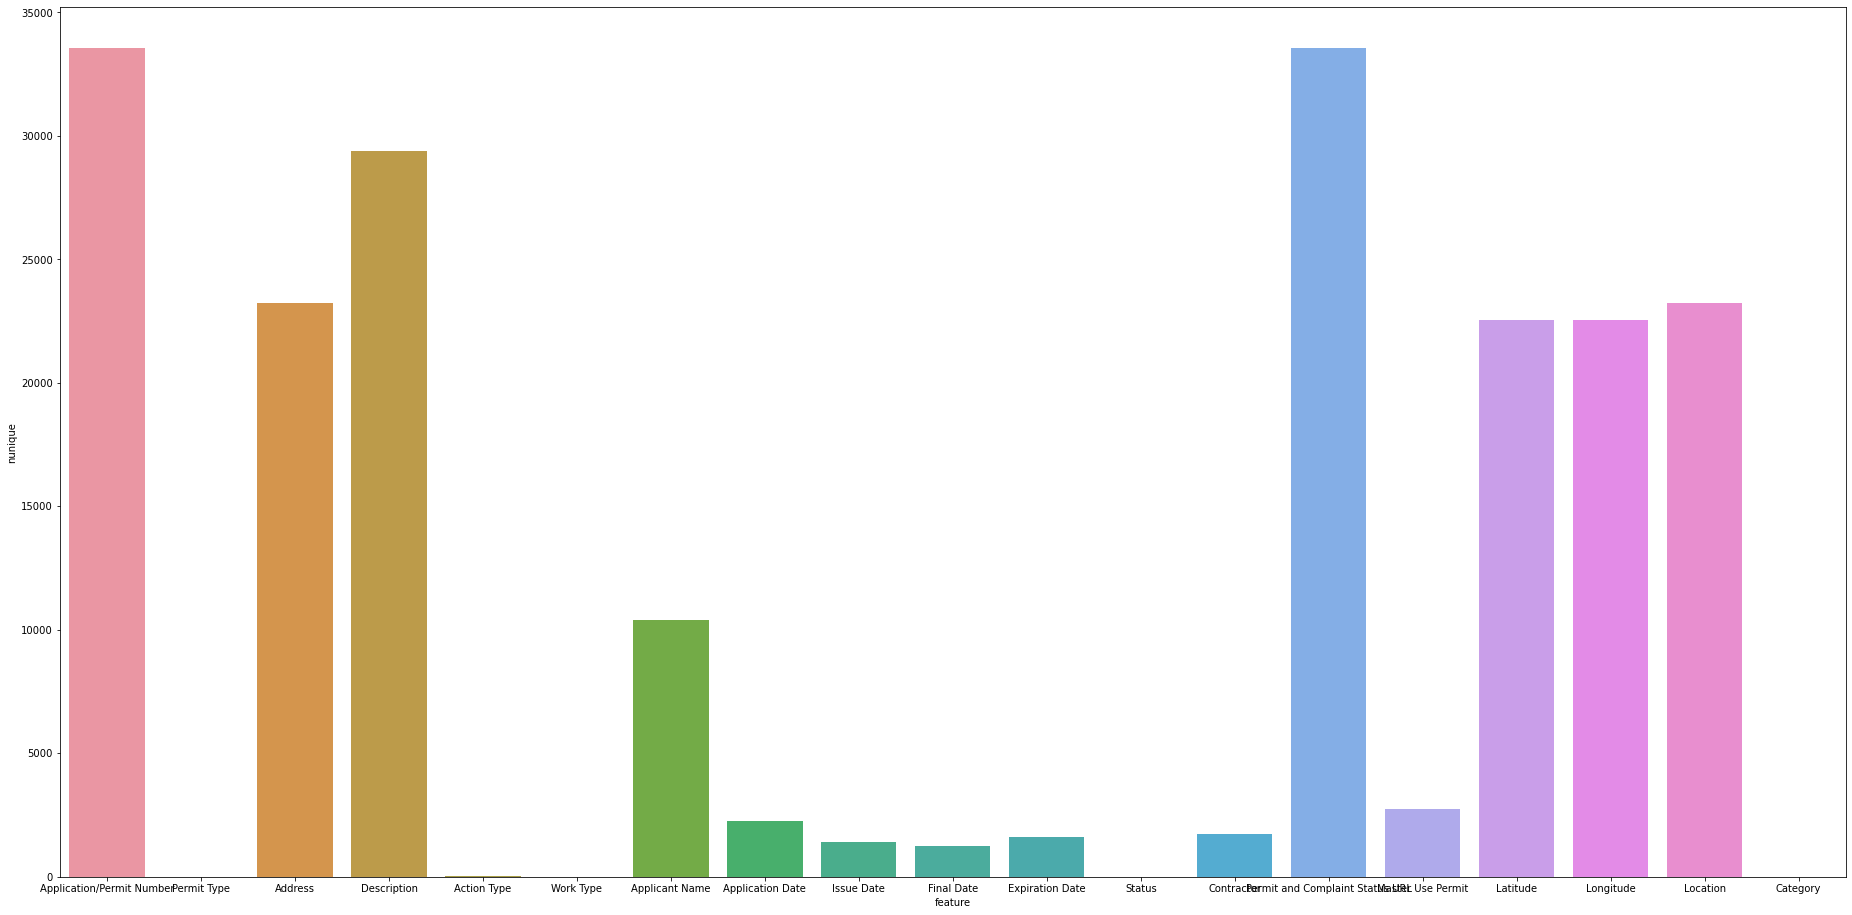

In [70]:
plt.figure(figsize=(32,16))
nu = train_df.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [12]:
train_df['Status'].unique()

array(['Permit Issued', 'Permit Closed', 'Initial Information Collected',
       'Permit Finaled', 'AP Closed', 'CANCELLED', 'Application Accepted',
       nan, 'Reviews Completed', 'Information Collected',
       'Cert of Occupancy Authorized', 'AP Finaled', 'Inspections Added'],
      dtype=object)

In [13]:
train_df['Category'].unique()

array(['SINGLE FAMILY / DUPLEX', 'COMMERCIAL', 'INSTITUTIONAL',
       'MULTIFAMILY', 'INDUSTRIAL'], dtype=object)

In [18]:
permit_issued_location=train_df[(train_df['Status']=='Permit Issued')]
permit_issued_location=permit_issued_location[['Latitude','Longitude']]
permit_issued_location

,Latitude,Longitude
0,47.636732,-122.319828
15,47.622564,-122.320601
22,47.573915,-122.305685
25,47.540582,-122.295333
27,47.522631,-122.269233
...,...,...
33488,47.653670,-122.359298
33490,47.658889,-122.289492
33520,47.623457,-122.324434
33532,47.676152,-122.384608


In [43]:
import folium

m=folium.Map(location=[permit_issued_location['Latitude'].mean(),permit_issued_location['Longitude'].mean()],zoom_start=5,tiles='Stamen toner')

for _,row in (permit_issued_location[:200].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='orange',
    fill=True,
    fill_color='orange').add_to(m)
m

In [44]:
permit_issued_category=train_df[(train_df['Status']=='Permit Issued')&(train_df['Category']=='SINGLE FAMILY / DUPLEX')]
permit_issued_category_loc=permit_issued_category[['Latitude','Longitude']]
permit_issued_category_loc

,Latitude,Longitude
0,47.636732,-122.319828
22,47.573915,-122.305685
25,47.540582,-122.295333
33,47.722700,-122.295213
36,47.635384,-122.400605
...,...,...
33467,47.727717,-122.302073
33475,47.576245,-122.393112
33490,47.658889,-122.289492
33532,47.676152,-122.384608


In [45]:
import folium

m1=folium.Map(location=[permit_issued_category_loc['Latitude'].mean(),permit_issued_category_loc['Longitude'].mean()],zoom_start=5,tiles='Stamen toner')

for _,row in (permit_issued_category_loc[:200].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='orange',
    fill=True,
    fill_color='orange').add_to(m1)
m1

In [46]:
permit_issued_comm=train_df[(train_df['Status']=='Permit Issued')&(train_df['Category']=='COMMERCIAL')]
permit_issued_comm_loc=permit_issued_comm[['Latitude','Longitude']]
print(permit_issued_comm_loc)
import folium

for _,row in (permit_issued_comm_loc[:200].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='red',
    fill=True,
    fill_color='red').add_to(m1)
m1

        Latitude   Longitude
15     47.622564 -122.320601
27     47.522631 -122.269233
78     47.615401 -122.335818
81     47.621808 -122.336257
91     47.611930 -122.337186
...          ...         ...
33434  47.618797 -122.337548
33451  47.612898 -122.335328
33459  47.615981 -122.343702
33466  47.601984 -122.331755
33484  47.620445 -122.356516

[1515 rows x 2 columns]


In [47]:
permit_issued_comm=train_df[(train_df['Status']=='Permit Issued')&(train_df['Category']=='INSTITUTIONAL')]
permit_issued_comm_loc=permit_issued_comm[['Latitude','Longitude']]
print(permit_issued_comm_loc)
import folium

# m2=folium.Map(location=[permit_issued_comm_loc['Latitude'].mean(),permit_issued_comm_loc['Longitude'].mean()],zoom_start=5,tiles='Stamen toner')

for _,row in (permit_issued_comm_loc[:200].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='green',
    fill=True,
    fill_color='green').add_to(m1)
m1

        Latitude   Longitude
322    47.723692 -122.306770
666    47.603999 -122.323784
866    47.634084 -122.284846
882    47.670605 -122.362261
1682   47.608848 -122.321942
...          ...         ...
32757  47.650350 -122.309087
32778  47.598632 -122.326003
33093  47.538274 -122.284071
33375  47.652890 -122.345217
33453  47.535160 -122.265574

[169 rows x 2 columns]


In [48]:
permit_issued_comm=train_df[(train_df['Status']=='Permit Issued')&(train_df['Category']=='MULTIFAMILY')]
permit_issued_comm_loc=permit_issued_comm[['Latitude','Longitude']]
print(permit_issued_comm_loc)
import folium

for _,row in (permit_issued_comm_loc[:200].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='blue',
    fill=True,
    fill_color='blue').add_to(m1)
m1

        Latitude   Longitude
34     47.618952 -122.316546
53     47.606752 -122.323463
62     47.618348 -122.324932
236    47.553266 -122.279962
314    47.610363 -122.340381
...          ...         ...
33457  47.570068 -122.297248
33469  47.596788 -122.286866
33479  47.555335 -122.285380
33488  47.653670 -122.359298
33520  47.623457 -122.324434

[793 rows x 2 columns]


In [49]:
permit_issued_comm=train_df[(train_df['Status']=='Permit Issued')&(train_df['Category']=='INDUSTRIAL')]
permit_issued_comm_loc=permit_issued_comm[['Latitude','Longitude']]
print(permit_issued_comm_loc)
import folium

for _,row in (permit_issued_comm_loc[:200].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='pink',
    fill=True,
    fill_color='pink').add_to(m1)
m1

        Latitude   Longitude
263    47.590425 -122.324997
1723   47.629143 -122.371033
2085   47.570706 -122.330120
2133   47.548682 -122.325512
2845   47.662459 -122.378238
...          ...         ...
30901  47.585071 -122.322067
30932  47.589579 -122.326816
31339  47.534932 -122.317899
31936  47.558328 -122.352402
32021  47.568817 -122.365913

[68 rows x 2 columns]


In [120]:
##Feature Engineering

In [32]:
train_df=train_df.drop(columns=['Application/Permit Number','Permit and Complaint Status URL'])

## 2.1 Categorial Encoding

In [30]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
categorical_cols = ['Action Type','Applicant Name','Status','Location','Address','Application Date','Issue Date','Final Date','Expiration Date','Contractor','Master Use Permit']
train_df.update(train_df[categorical_cols].fillna(-999))

In [31]:
train_df.isna().sum()

Application/Permit Number           0
Permit Type                         0
Address                             0
Description                        10
Action Type                         0
Work Type                           0
Applicant Name                      0
Application Date                    0
Issue Date                          0
Final Date                          0
Expiration Date                     0
Status                              0
Contractor                          0
Permit and Complaint Status URL     0
Master Use Permit                   0
Latitude                           21
Longitude                          21
Location                            0
Category                            0
dtype: int64

In [34]:
Location=train_df[['Latitude','Longitude']].dropna()
print((Location['Latitude']))

0        47.636732
1        47.518298
2        47.624025
3        47.595020
4        47.705686
           ...    
33534    47.550138
33535    47.592970
33536    47.670508
33537    47.549138
33538    47.639436
Name: Latitude, Length: 33518, dtype: float64


In [35]:
from sklearn.cluster import KMeans
clusters=10
kmeans=KMeans(n_clusters=clusters,random_state=0).fit(Location[['Latitude','Longitude']].values)

Text(0.5, 0, 'Latitude')

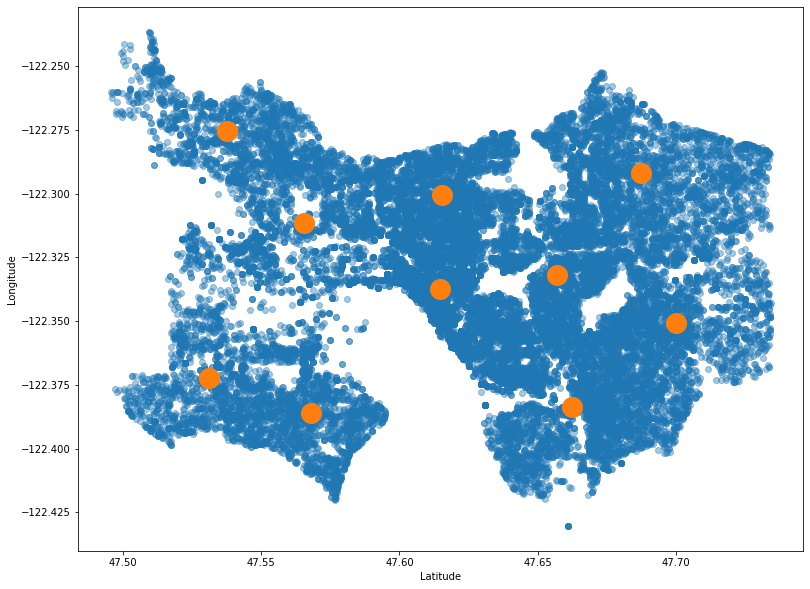

In [37]:
fig,ax1=plt.subplots(figsize=(13,10))
ax1.scatter(Location.Latitude,Location.Longitude,alpha=0.4,label='samples')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers',s=400)
ax1.set_ylabel('Longitude')
ax1.set_xlabel('Latitude')

In [38]:
kmean_feats=pd.DataFrame(kmeans.fit_transform(Location[['Latitude','Longitude']].values),columns=['gspatial_' + str(i) for i in range(clusters)])
kmean_feats

,gspatial_0,gspatial_1,gspatial_2,gspatial_3,gspatial_4,gspatial_5,gspatial_6,gspatial_7,gspatial_8,gspatial_9
0,0.095233,0.028830,0.068724,0.028037,0.023626,0.118011,0.108603,0.071717,0.070263,0.057883
1,0.058398,0.111416,0.146573,0.098203,0.140750,0.021202,0.082588,0.064709,0.181648,0.180689
2,0.073879,0.037976,0.059831,0.009244,0.033504,0.099254,0.106462,0.064122,0.076973,0.078162
3,0.063367,0.034457,0.086877,0.021613,0.062116,0.077553,0.078250,0.034154,0.107165,0.099383
4,0.152440,0.092536,0.077029,0.092503,0.050042,0.182253,0.173884,0.140441,0.031052,0.033807
...,...,...,...,...,...,...,...,...,...,...
33513,0.099542,0.066299,0.147289,0.081264,0.115553,0.086536,0.017827,0.027904,0.162301,0.137254
33514,0.091750,0.022466,0.110437,0.045284,0.072678,0.097115,0.059617,0.030687,0.119346,0.094553
33515,0.157230,0.064930,0.117419,0.090033,0.066707,0.175063,0.133106,0.114127,0.089063,0.030288
33516,0.107706,0.069259,0.153419,0.087174,0.119771,0.094275,0.012356,0.035414,0.166506,0.138708


In [39]:
kmean_feats=pd.DataFrame(kmeans.fit_transform(Location[['Latitude','Longitude']].values),index=np.unique(np.where(train_df[['Longitude','Latitude']].notna())),columns=['gspatial_' + str(i) for i in range(clusters)])
train_df=pd.concat([train_df,kmean_feats],axis=1)

In [40]:
train_df.isna().sum()

Permit Type           0
Address               0
Description          10
Action Type           0
Work Type             0
Applicant Name        0
Application Date      0
Issue Date            0
Final Date            0
Expiration Date       0
Status                0
Contractor            0
Master Use Permit     0
Latitude             21
Longitude            21
Location              0
Category              0
gspatial_0           21
gspatial_1           21
gspatial_2           21
gspatial_3           21
gspatial_4           21
gspatial_5           21
gspatial_6           21
gspatial_7           21
gspatial_8           21
gspatial_9           21
dtype: int64

In [ ]:
# enc = OrdinalEncoder()
# categorical_features = pd.DataFrame(enc.fit_transform(train_df[categorical_cols].values), columns=categorical_cols)
# categorical_features

In [41]:
print("\nCreate Day Variables")

train_df['Application Date'] = pd.to_datetime(train_df['Application Date'], format='%Y-%m-%d')
train_df['Issue Date'] = pd.to_datetime(train_df['Issue Date'], format='%Y-%m-%d')
train_df['Final Date'] = pd.to_datetime(train_df['Final Date'], format='%Y-%m-%d')
train_df['Expiration Date'] = pd.to_datetime(train_df['Expiration Date'], format='%Y-%m-%d')
    
    
train_df['App_day'] = train_df['Application Date'].dt.day
train_df['Issue_Day'] = train_df['Issue Date'].dt.day
train_df['Final_Day'] = train_df['Final Date'].dt.day
train_df['Exp_Day']   = train_df['Expiration Date'].dt.day

train_df['App_week'] = train_df['Application Date'].dt.week
train_df['Issue_week'] = train_df['Issue Date'].dt.week
train_df['Final_week'] = train_df['Final Date'].dt.week
train_df['Exp_week']   = train_df['Expiration Date'].dt.week


Create Day Variables


<ipython-input-41-762f9740e2ca>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['App_week'] = train_df['Application Date'].dt.week
<ipython-input-41-762f9740e2ca>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Issue_week'] = train_df['Issue Date'].dt.week
<ipython-input-41-762f9740e2ca>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Final_week'] = train_df['Final Date'].dt.week
<ipython-input-41-762f9740e2ca>:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Exp_week']   = train_df['Expiration Date'].dt.week
